# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#типы данных и кол-во ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<a id="title1"></a>

In [2]:
shape = data.shape 
print('DataFrame Shape :', shape) 
print('Number of rows :', shape[0]) 
print('Number of columns :', shape[1])


DataFrame Shape : (23699, 22)
Number of rows : 23699
Number of columns : 22


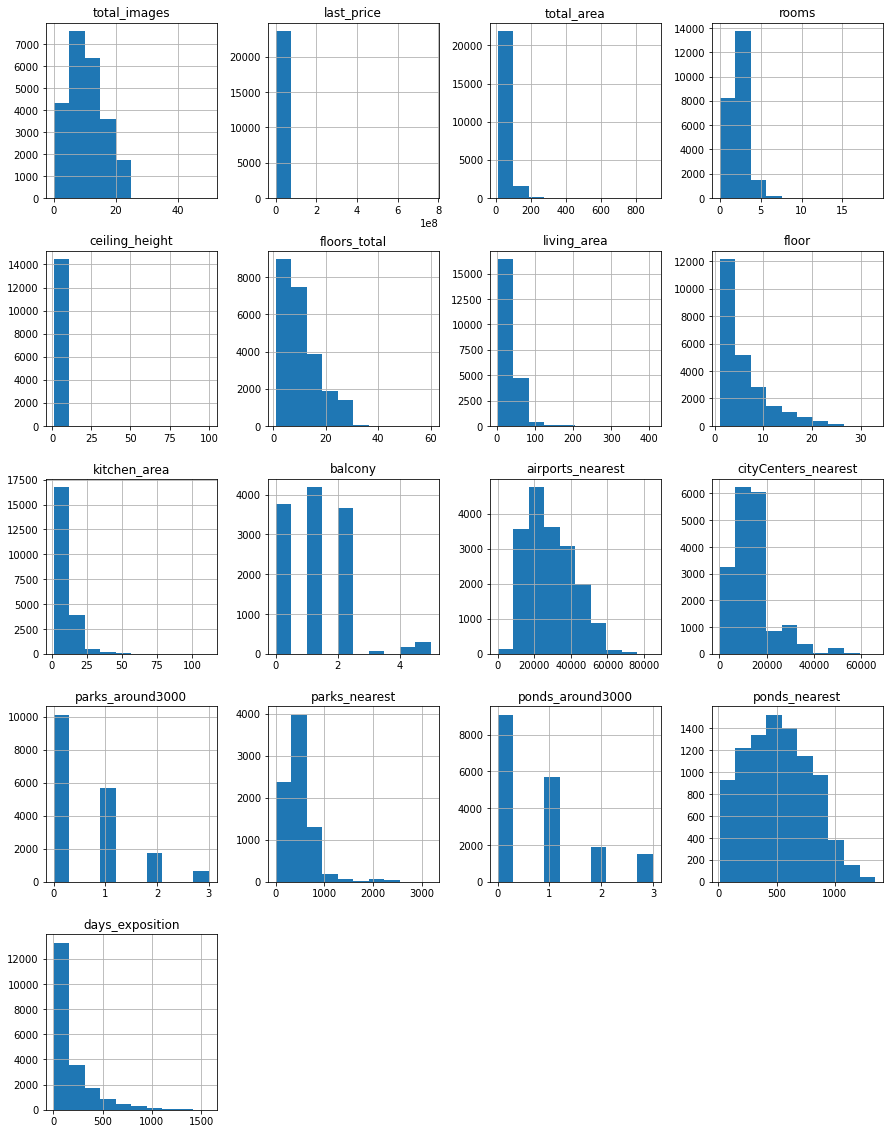

In [3]:
data.hist(figsize=(15, 20));

**Вывод**
first_day_exposition -object - должен быть datetime 

ceiling_height - нулевые значения 

floors_total  - float- должен быть int, также нулевые значения

living_area - нулевые значения

is_apartment - object-должен быть bool 

kitchen_area - нулевые значения

balcony - нулевые значения

locality_name - нулевые значения

airports_nearest - нулевые значения

cityCenters_nearest - нулевые значения

parks_around3000 - тип должен быть int, также нулевые значения

parks_nearest - нулевые значения

ponds_around3000 - тип должен быть int,также  нулевые значения

ponds_nearest - нулевые значения

days_exposition - нулевые значения

### Выполните предобработку данных

In [4]:
print(data.columns)
#значения в столбцах для выявления нестандартных значений на первый взгляд и ошибок, 
#все эти столбца оставляем как есть
data['total_images'].value_counts()
data['ceiling_height'].value_counts()
data['floor'].value_counts()
data['is_apartment'].value_counts()
data['total_area'].value_counts()
data['rooms'].value_counts()
data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around3000'].value_counts()



Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [5]:
#переведем столбец с датой в формат даты без времени, время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000.0,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,...,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
14382,9,1700000.0,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,...,8.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
11285,0,1950000.0,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,...,9.0,2.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


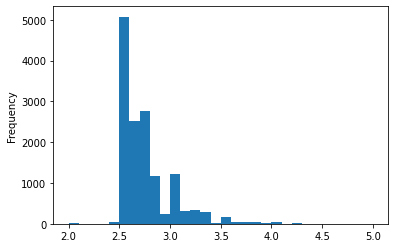

In [6]:
#смотрим параметр ceiling_height, видим что есть необоснованно большие значения но пока оставим их как есть,
#медиана от среднего отличается не сильно из-за этих выбросов во всей выборке
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

In [7]:
#смотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, остается как есть
#Удаляем записи, где отсутсвует этажность и изменяем тип на инт
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [8]:
#living_area слишком много знаков после запятой и есть пропущенные значения, заменяем значение на среднее
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['living_area'].describe()

count    23613.000000
mean        34.602495
std         22.367962
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [9]:
# kitchen_area заменяем значения на среднее значение
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
data['kitchen_area'].describe()

count    23613.000000
mean        10.503068
std          6.040315
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [10]:
#столбец апартаменты видимо появился не вместе с началом ведения записей из за того что аппартаменты появились недавно, 
#все пропущенные значения заменим на False
#
data['is_apartment'] = data['is_apartment'].fillna(False)


In [11]:
#заменяем пропуски в balcony на 0 и изменяем тип данных на int
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [12]:
#пропущенные значения в locality_name не будем трогать, непонятно причина их пропуска
data['locality_name'].value_counts()

Санкт-Петербург            15651
посёлок Мурино               520
посёлок Шушары               439
Всеволожск                   398
Пушкин                       369
                           ...  
посёлок Высокоключевой         1
посёлок Коробицыно             1
деревня Вахнова Кара           1
деревня Малая Романовка        1
поселок Почап                  1
Name: locality_name, Length: 364, dtype: int64

In [13]:
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23613, dtype: int64

In [14]:
#Проверяем количество дубликатов
print('\nЧисло дубликатов:', data.duplicated().sum())


Число дубликатов: 0


In [15]:
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].unique()

Количество уникальных значений: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
# Замечены неявные дубликаты, устраним их... приведём значения к нижнему регистру для избавления от дубликатов
data['locality_name'] = data['locality_name'].str.lower()

# Выполним замену ошибки в написании 'поселок' вместо 'посёлок':
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

# Замена однотипный значений
data['locality_name'] = data.locality_name.str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data.locality_name.str.replace('городской поселок', 'поселок')

# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{nan,
 'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской посёлок большая ижора',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'д

In [17]:
# Приведем имя колонки cityCenters_nearest к единому стилю
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [18]:
# Пробелы восполнены, типы данных приведенны в порядок
print(data.isna().sum())
data.info()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  i

Вывод: заполненны пропуски где это было возможно, и измененны типы данных. Также можно сказать что довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует. Об этом обязательно необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных.

### Добавьте в таблицу новые столбцы

In [19]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

In [20]:
# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [21]:
# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)


In [22]:
# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)


In [23]:
# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)


In [24]:
# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,9999,120370,3,3,2019,47,23,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0.0,NaN,81,82920,1,12,2018,46,27,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2.0,574.0,558,92785,3,8,2015,61,14,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.810749,9,False,...,3.0,234.0,424,408176,4,7,2015,57,17,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121,100000,1,6,2018,32,41,другой


In [25]:
# Округляем 
data['distance_city_center_km'] = round(data['city_centers_nearest'] / 1000)
try:
    data['distance_city_center_km'] =  round(data['distance_city_center_km'], 2).astype('Int32')
    print('Все ОК!')
except:
    print('Необходимо изменить номер бита переменной типа int')
    
data.head()

Все ОК!


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type,distance_city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,9999,120370,3,3,2019,47,23,другой,16
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,81,82920,1,12,2018,46,27,первый,19
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,574.0,558,92785,3,8,2015,61,14,другой,14
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.810749,9,False,...,234.0,424,408176,4,7,2015,57,17,другой,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121,100000,1,6,2018,32,41,другой,8


<a id="title2"></a>

In [26]:
shape = data.shape 
print('DataFrame Shape :', shape) 
print('Number of rows :', shape[0]) 
print('Number of columns :', shape[1])

DataFrame Shape : (23613, 30)
Number of rows : 23613
Number of columns : 30


Вывод: Мы также имеем больше 90% изначальных данных.

### Проведите исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

In [27]:
print('Анализ общей площади')
print(data.total_area.describe())
print('-' * 35)
print('Анализ жилой площади')
print(data.living_area.describe())

Анализ общей площади
count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64
-----------------------------------
Анализ жилой площади
count    23613.000000
mean        34.602495
std         22.367962
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


Диаграмма размаха


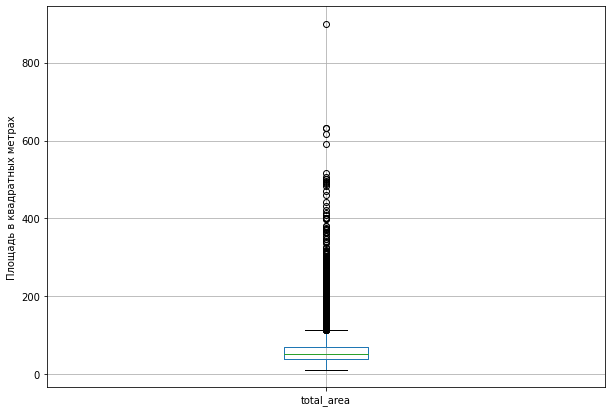

In [28]:
print('Диаграмма размаха')
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

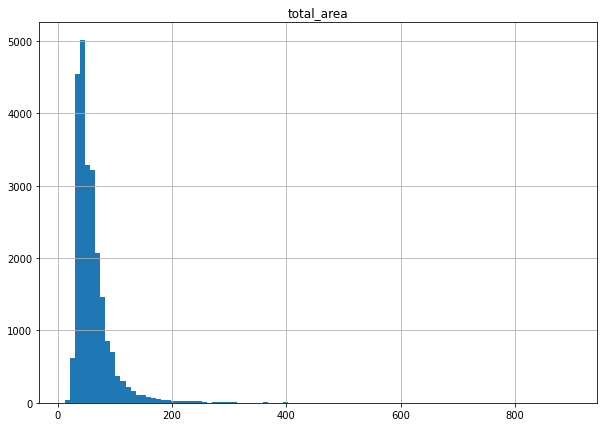

In [29]:
data.hist('total_area', bins=100, figsize=(10,7));

In [30]:
#отсекаем в данном диапазоне для более глубокого анализа
df = data.query('total_area >= 20 & total_area <= 100')

Диаграмма размаха площади после отсечения выбивающихся значений


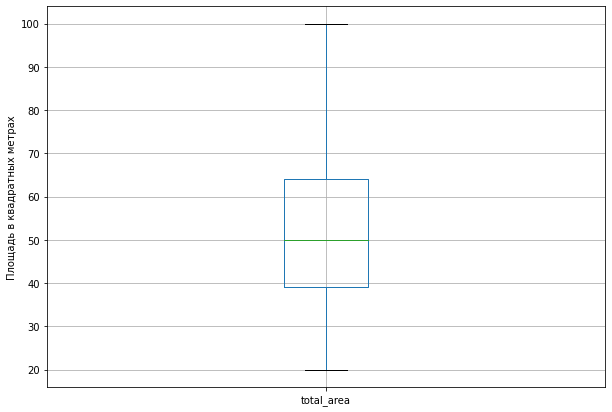

In [31]:
print('Диаграмма размаха площади после отсечения выбивающихся значений')
df.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

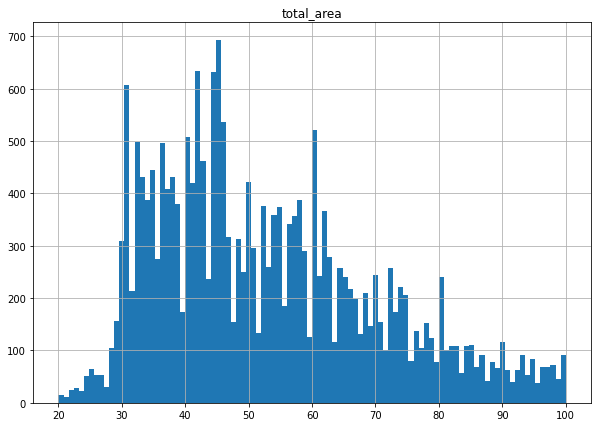

In [32]:
df.hist('total_area', bins=100, figsize=(10,7));

**Площадь кухни**

In [33]:
data.kitchen_area.describe()

count    23613.000000
mean        10.503068
std          6.040315
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Диаграмма размаха площади кухни


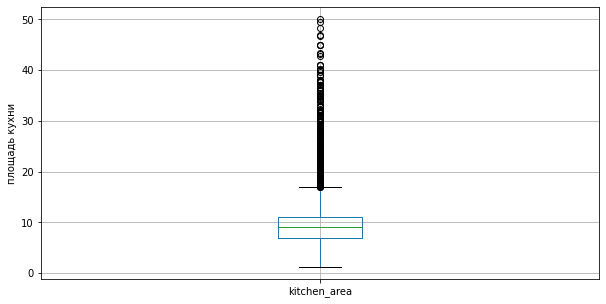

In [34]:
print('Диаграмма размаха площади кухни')
df.boxplot('kitchen_area', figsize=(10,5))
plt.ylabel('площадь кухни')
plt.show()

In [35]:
df = df.query('kitchen_area > 5 and kitchen_area <= 17')

Диаграмма размаха площади кухни


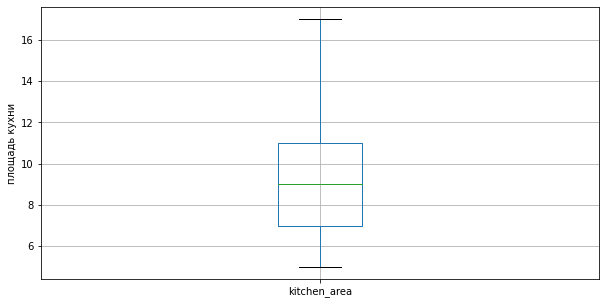

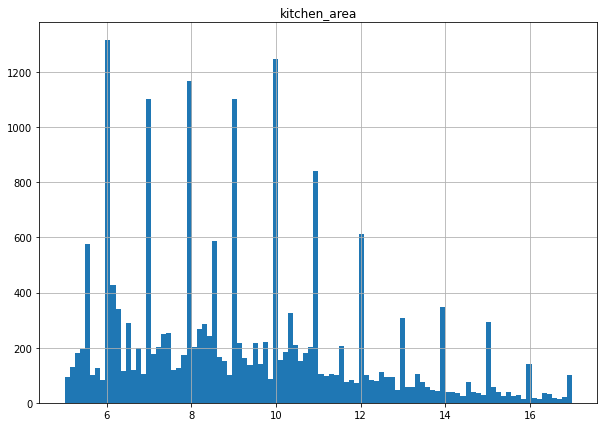

In [36]:
print('Диаграмма размаха площади кухни')
df.boxplot('kitchen_area', figsize=(10,5))
plt.ylabel('площадь кухни')
plt.show()
df.hist('kitchen_area', bins= 100, figsize=(10,7));

**Цена**

Диаграмма размаха цены предложений


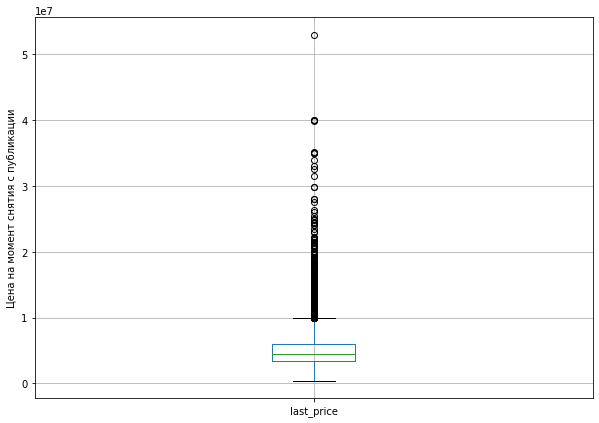

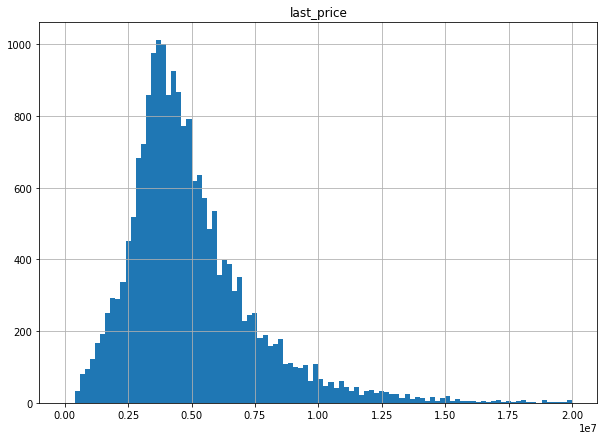

In [37]:
print('Диаграмма размаха цены предложений')
df.boxplot('last_price', figsize=(10,7))
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
df.hist('last_price', bins=100, range=(0,2e+07), figsize=(10,7));

In [38]:
df = df.query('last_price <= 9000000')

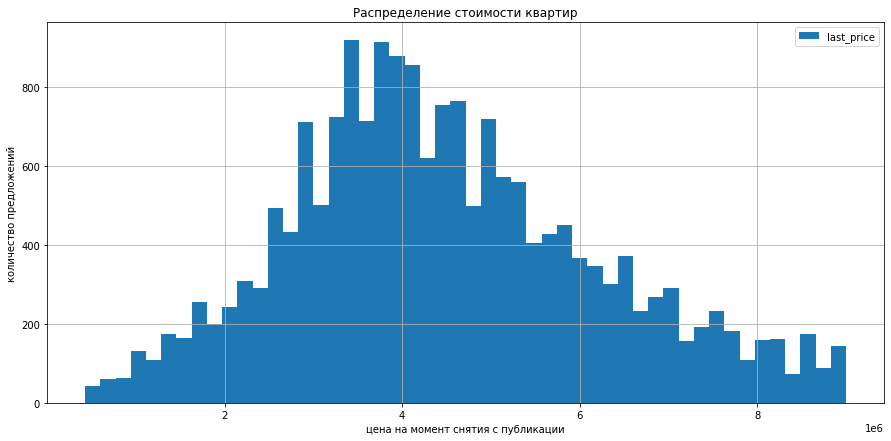

In [39]:
df.plot(kind='hist', y='last_price', title='Распределение стоимости квартир',grid=True, bins=50, figsize=(15,7))
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

**Количество комнат**

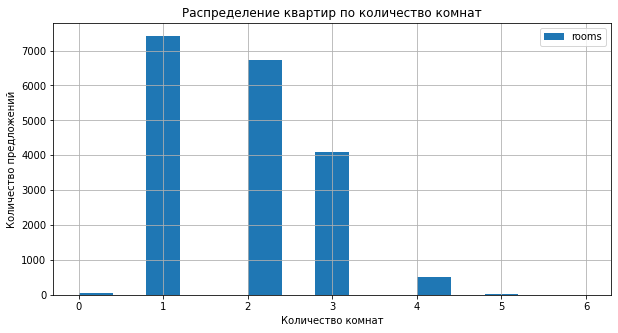

In [40]:
df.plot(kind='hist',y='rooms',title='Распределение квартир по количество комнат',grid=True, bins=15, figsize=(10,5))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

**Высота потолков**

Диаграмма размаха высоты потолков


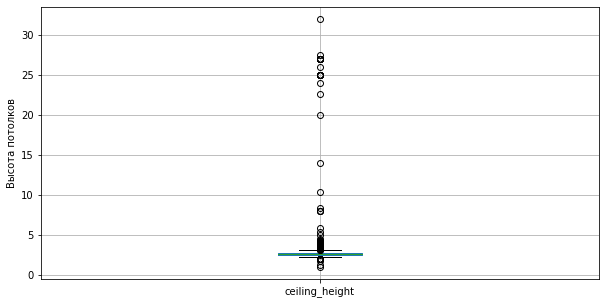

In [41]:
print('Диаграмма размаха высоты потолков')
df.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.ylabel('Высота потолков')
plt.show()

In [42]:
df = df.query('ceiling_height > 2.4 and ceiling_height < 2.8')

Диаграмма размаха высоты потолков


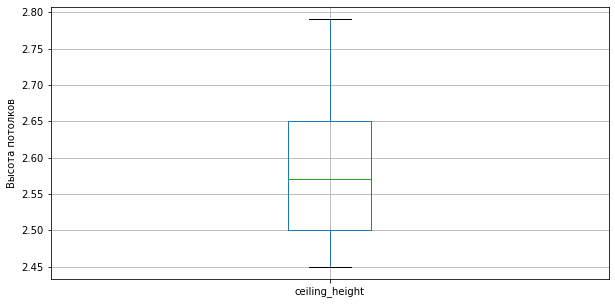

In [43]:
print('Диаграмма размаха высоты потолков')
df.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.ylabel('Высота потолков')
plt.show()

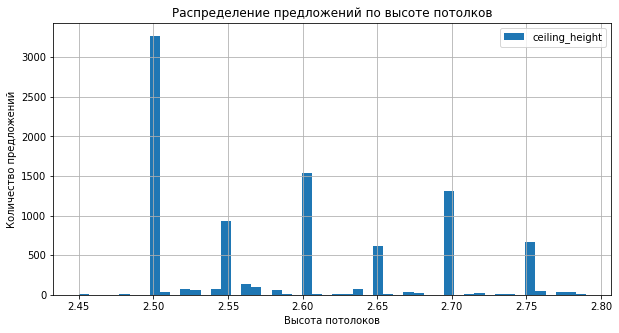

In [44]:
df.plot(kind='hist',y='ceiling_height',grid=True, bins=50, figsize=(10,5), \
        title='Распределение предложений по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

Опираясь на результаты проведенного анализа, определенно можно заявить: большинство предложение на рынке, это 1-2 комнатные квартиры в ценовом диапозоне 4 млн.руб. с общей площадью до 50м², где площадь кухни - 6м², а средняя высота потолка 2.65 метра - по всей видимости - это дома хрущёвской постройки

**Этаж квартиры**

In [45]:
df.floor.describe()

count    9264.000000
mean        5.644214
std         4.484735
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        27.000000
Name: floor, dtype: float64

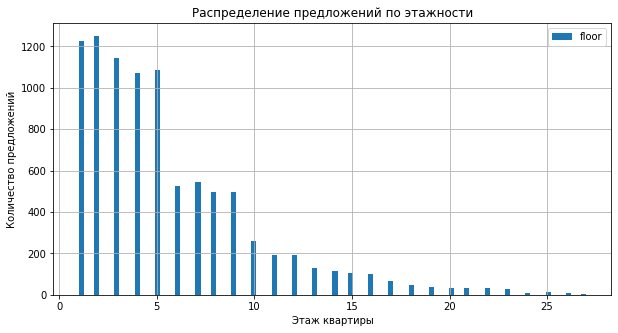

In [46]:
df.plot(kind='hist',y='floor',grid=True, bins=100, figsize=(10,5), \
        title='Распределение предложений по этажности')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()

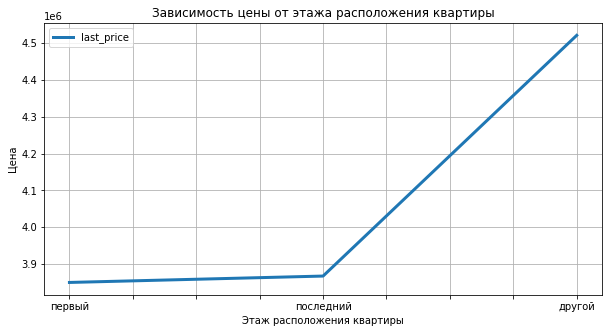

In [47]:
df.pivot_table(index='floor_type', values='last_price').sort_values(by='last_price', ascending=True) \
  .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')

plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

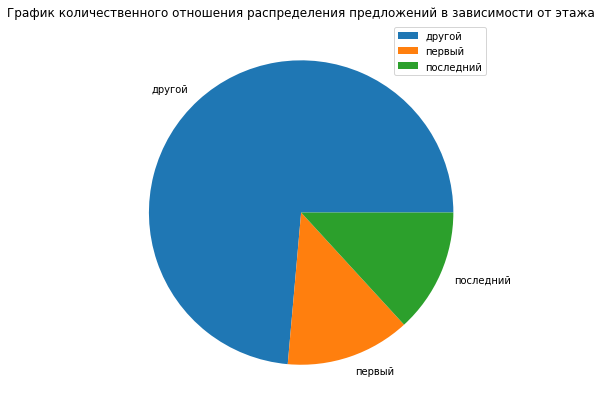

In [48]:
df.pivot_table(index='floor_type',values='last_price', aggfunc='count')\
    .plot.pie(y='last_price',figsize= (10,7), label='', title='График количественного отношения распределения предложений в зависимости от этажа') 
plt.show()

**Общее количество этажей в доме**

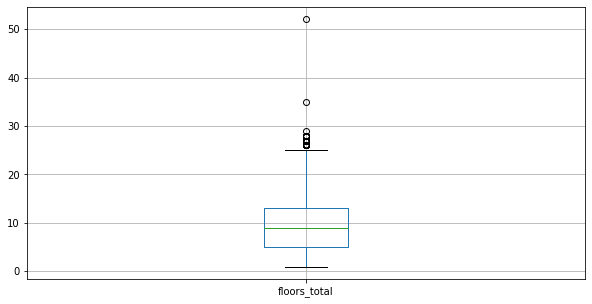

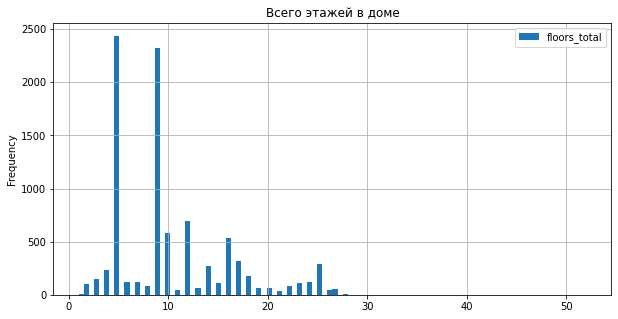

In [49]:
df.boxplot(column=['floors_total'], grid=True, figsize=(10,5))
df.plot.hist(y='floors_total',grid=True, bins=100, figsize=(10,5), title='Всего этажей в доме');

Глядя на графики, становится более очевидно, что основное количество предложений по продаже квартиры на рынке исходит от собственников пятиэтажных и девятиэтажных "хрущевок"

**Расстояние до центра города в метрах**

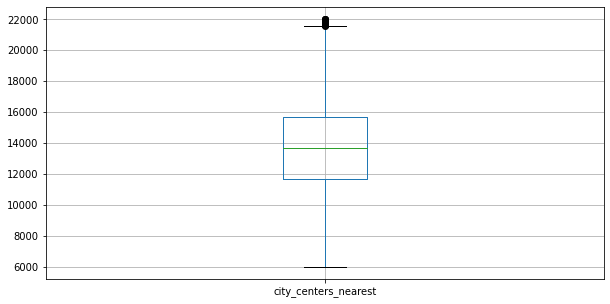

In [50]:
df = df.query('city_centers_nearest > 6000 and city_centers_nearest < 22000')
df.boxplot('city_centers_nearest', figsize=(10,5));

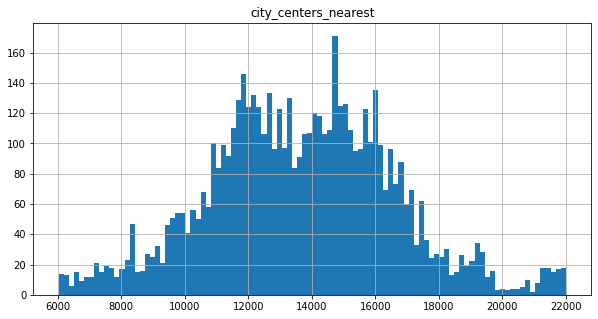

In [51]:
df.hist('city_centers_nearest', bins=100, figsize=(10,5));

**Расстояние до ближайшего аэропорта**

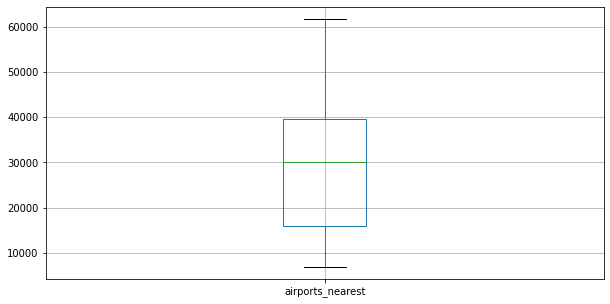

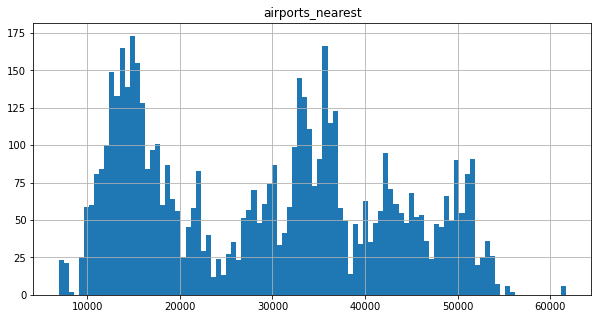

In [52]:
df.boxplot('airports_nearest', figsize=(10,5))
df.hist('airports_nearest', bins=100, figsize=(10,5));

**Расстояние до ближайшего парка**

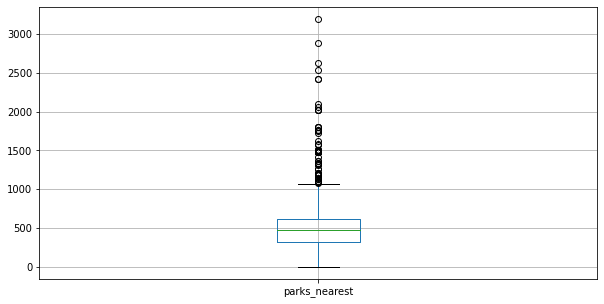

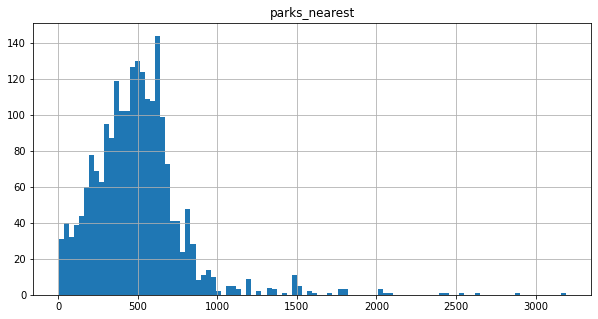

In [53]:
df.boxplot('parks_nearest', figsize=(10,5))
df.hist('parks_nearest', bins=100, figsize=(10,5));

**День и месяц публикации объявления**

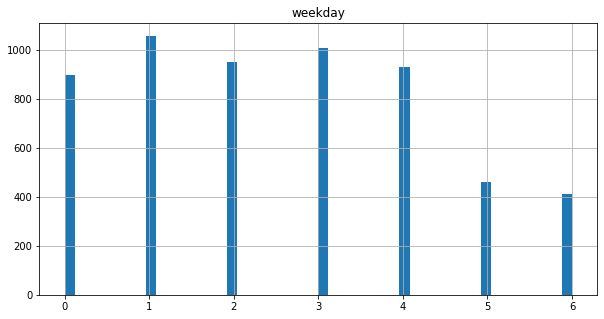

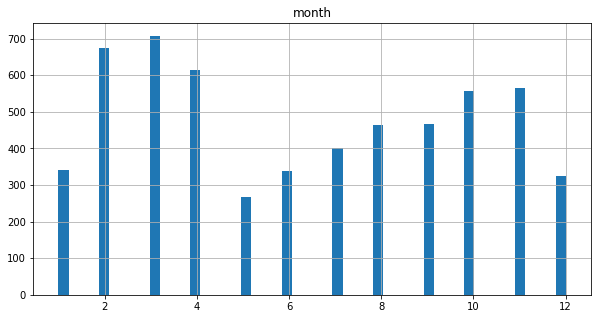

In [54]:
df.hist('weekday', bins=50, figsize=(10,5));
df.hist('month', bins=50, figsize=(10,5));

Определенно мы видим, что чаще все люди задумываются о продаже с февраля по апрель и с августа по ноябрь. И размещают объявление в будние рабочие дни. Также видим, что в большинстве из случаев парки располагаются в пешой доступности, а расстояние до аэропорта и до центра в пределах часовой езды на такси.

**Изучаем время продажи квартиры**

In [55]:
data.days_exposition.describe()

count    23613.000000
mean      1499.779571
std       3354.374773
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       9999.000000
Name: days_exposition, dtype: float64

Время продаж


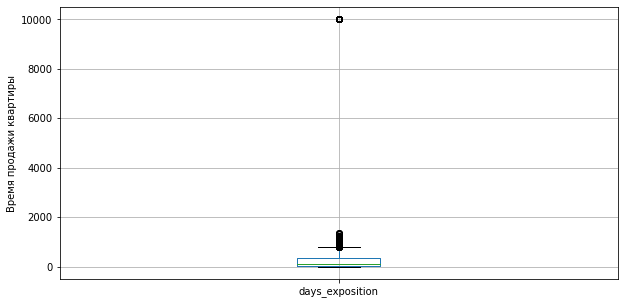

In [56]:
print('Время продаж')
df.boxplot('days_exposition', figsize=(10,5))
plt.ylabel('Время продажи квартиры')
plt.show()

In [57]:
df = df.query('days_exposition < 250')

Время продаж


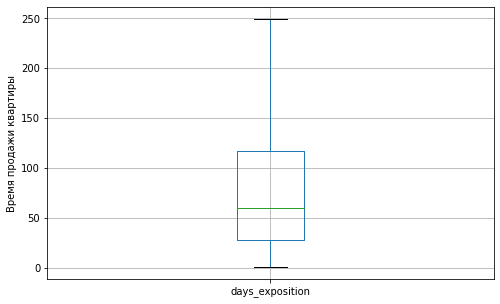

In [58]:
df = df.query('days_exposition < 250')
print('Время продаж')
df.boxplot('days_exposition', figsize=(8,5))
plt.ylabel('Время продажи квартиры')
plt.show()

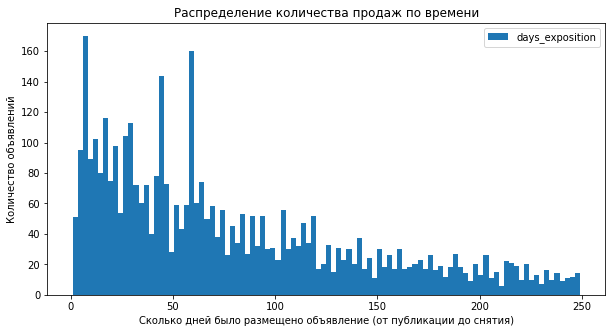

In [59]:
df.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=100, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

Вывод: На гистограмме заметны пики примерно через 45,60 и 90 дней после начала продажи. Однако это может быть условием размещение объявлений, где после этих сроков, объявления удаляются. Поэтому по диаграмме размаха, быстрые продажи осуществлялись примерно за 20 дней, а долгие продажи осуществлялись за 120 дней. Медианное значение продаж составляет 60 дней.

**Какие факторы больше всего влияют на полную стоимость объекта?**

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра

In [60]:
df['city_centers_nearest'] = df['city_centers_nearest']/1000

In [61]:
# Сводную таблицу: проверим зависимость цены с площадью, с количеством комнат и с расстоянием до центра
df = df.pivot_table(index='last_price', values=['total_area','rooms','city_centers_nearest'])
df.reset_index().head()

,last_price,city_centers_nearest,rooms,total_area
0,1200000,12.313,4.0,49.1
1,1900000,15.277,2.0,41.0
2,2130000,15.677,2.0,42.8
3,2350000,17.695,1.0,30.1
4,2370000,13.772,1.0,32.7


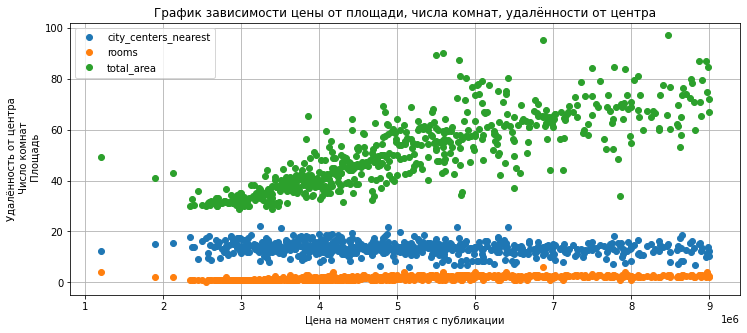

In [62]:
# Для наглядности построим cкаттерплот
df.plot(style='o',grid=True, figsize=(12, 5), title='График зависимости цены от площади, числа комнат, удалённости от центра')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удалённость от центра\n Число комнат\n Площадь')
plt.show()

Какие факторы больше всего влияют на полную стоимость объекта?

0.30239704158417774

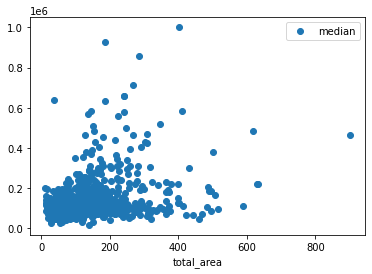

In [63]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['sm_price'])

Вывод: видим, что зависимость очень слабая - согласно корреляции Пирсона - 0.3! То есть, чем больше площадь тем немного выше стоимость!

Изучим зависимость цены квадратного метра от числа комнат.

0.05566894858321389

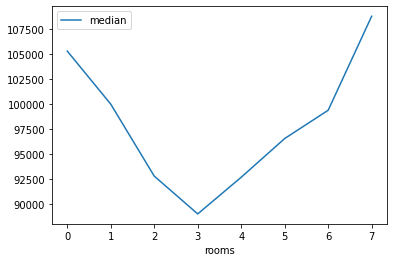

In [64]:


pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['sm_price'])

Вывод: чем ближе количество комнат к 3 тем ниже стоимость квадратного метра.

Изучим зависимость цены квадратного метра от этажа (первого или последнего).

,mean,count,median
floor_type,,,
первый,81995.385038,2914,81236.5
последний,93410.267686,3336,87777.0


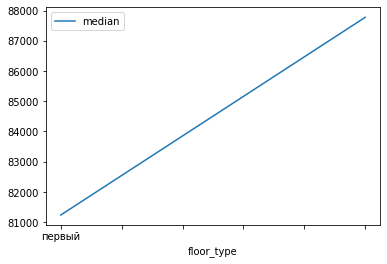

In [65]:
pivot_table_floor_category = data.query('floor_type != "другой"').pivot_table(index = 'floor_type', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Вывод: из графика ничего не понятно! Согласно медиане - как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 10%!

Изучим зависимость цены квадратного метра от удалённости от центра.

-0.3173561309592831

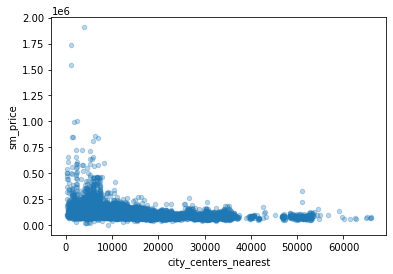

In [66]:
data.plot(kind = 'scatter', y = 'sm_price', x = 'city_centers_nearest', alpha = 0.3)

data['city_centers_nearest'].corr(data['sm_price'])

Вывод: видим явную зависимость стоимости квадратного метра от близости к центру! Чем ближе к центру, тем выше стоимость!

Изучим зависимость цены квадратного метра от даты размещения: дня недели.

In [67]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type,distance_city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,9999,120370,3,3,2019,47,23,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,81,82920,1,12,2018,46,27,первый,19
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.300000,4,False,...,574.0,558,92785,3,8,2015,61,14,другой,14
3,0,64900000,159.00,2015-07-24,3,NaN,14,90.810749,9,False,...,234.0,424,408176,4,7,2015,57,17,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121,100000,1,6,2018,32,41,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,...,381.0,9999,72490,1,3,2017,54,10,другой,4
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.000000,4,False,...,NaN,45,52542,0,1,2018,64,14,другой,<NA>
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.700000,1,False,...,NaN,9999,44091,6,2,2018,52,17,первый,<NA>
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.834748,12,False,...,196.0,602,149511,1,3,2017,57,30,другой,10


,mean,count,median
weekday,,,
1,99690.508873,4170,95577.5
2,99595.578615,3956,95473.0
3,100163.952625,4285,95121.0
0,99430.110772,3602,94703.0
4,98949.679037,3988,94607.5
6,97703.721302,1690,94533.0
5,98996.999480,1922,93545.5


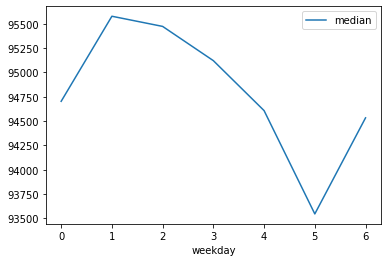

In [68]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Вывод: видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По субботам стоимость самая низкая!

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.

Изучим зависимость цены квадратного метра от даты размещения: месяца.

,mean,count,median
month,,,
4,101979.839966,2362,96543.0
8,100071.964963,1741,96000.0
9,100492.197568,1974,95607.5
11,99204.406937,2364,95588.0
3,98926.943798,2580,95227.5
1,99757.521390,1496,95186.0
2,98761.211983,2637,95000.0
7,99618.839053,1690,95000.0
12,99574.280926,1641,94262.0


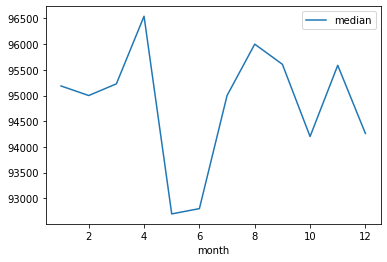

In [69]:
pivot_table_month_exposition = data.pivot_table(index = 'month', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Вывод: самая высокая стоимость метра в апреле и августе! Самая низкая стоимость в мае и июне! На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками.

Изучим зависимость цены квадратного метра от даты размещения: года.

,mean,count,median
year,,,
2014,124830.000000,137,107000.0
2019,107046.819923,2871,103199.0
2018,97741.675930,8492,95669.5
2015,104535.564189,1184,93405.0
2017,97622.150257,8166,92564.5
2016,98318.545060,2763,91803.0


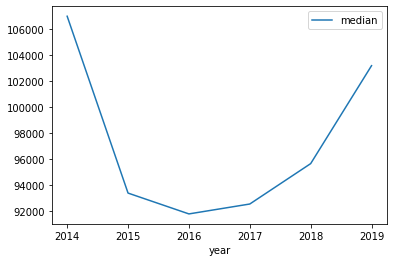

In [70]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Вывод: видим, что с 2014 до 2016 года цена падала, но далее начала увеличиваться! В СРЕДНЕМ! Мы не рассматриваем сегментацию рынка и по факту стоимость аналогичных квартир могла себя вести абсолютно иначе от года к году! В выводе присутствует реальный пример.
    

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [71]:
top_10 = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_10.columns=['number_of_ads']
top_10.reset_index()

,locality_name,number_of_ads
0,санкт-петербург,15651
1,посёлок мурино,552
2,посёлок шушары,439
3,всеволожск,398
4,пушкин,369
5,колпино,338
6,посёлок парголово,327
7,гатчина,307
8,деревня кудрово,299
9,выборг,237


In [72]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type,distance_city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,9999,120370,3,3,2019,47,23,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,81,82920,1,12,2018,46,27,первый,19
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.300000,4,False,...,574.0,558,92785,3,8,2015,61,14,другой,14
3,0,64900000,159.00,2015-07-24,3,NaN,14,90.810749,9,False,...,234.0,424,408176,4,7,2015,57,17,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121,100000,1,6,2018,32,41,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,...,381.0,9999,72490,1,3,2017,54,10,другой,4
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.000000,4,False,...,NaN,45,52542,0,1,2018,64,14,другой,<NA>
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.700000,1,False,...,NaN,9999,44091,6,2,2018,52,17,первый,<NA>
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.834748,12,False,...,196.0,602,149511,1,3,2017,57,30,другой,10


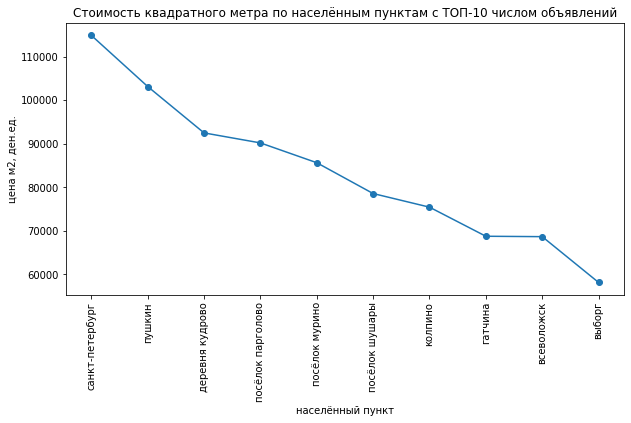

In [73]:
top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='sm_price', aggfunc='mean')
top_10s = top_10.sort_values(by='cost_per_meter_mean', ascending=False).reset_index()

# Построим график
fig, ax = plt.subplots(figsize=(10,5))
ax.set(title = 'Стоимость квадратного метра по населённым пунктам с ТОП-10 числом объявлений',
       xlabel='населённый пункт',
       ylabel='цена м2, ден.ед.')
ax.plot(top_10s['locality_name'], top_10s['cost_per_meter_mean'], 'o-')
plt.xticks(rotation='vertical')
plt.show()

In [74]:
# Выделим самую высокую и низкую цену
top_10s.style.format({'cost_per_meter_mean':'{:.2f} руб.'}) \
       .highlight_max(color='yellowgreen', subset='cost_per_meter_mean') \
       .highlight_min(color='coral', subset='cost_per_meter_mean')

,locality_name,number_of_ads,cost_per_meter_mean
0,санкт-петербург,15651,114868.43 руб.
1,пушкин,369,103125.37 руб.
2,деревня кудрово,299,92473.09 руб.
3,посёлок парголово,327,90175.49 руб.
4,посёлок мурино,552,85629.11 руб.
5,посёлок шушары,439,78550.88 руб.
6,колпино,338,75424.15 руб.
7,гатчина,307,68745.69 руб.
8,всеволожск,398,68654.01 руб.
9,выборг,237,58141.49 руб.


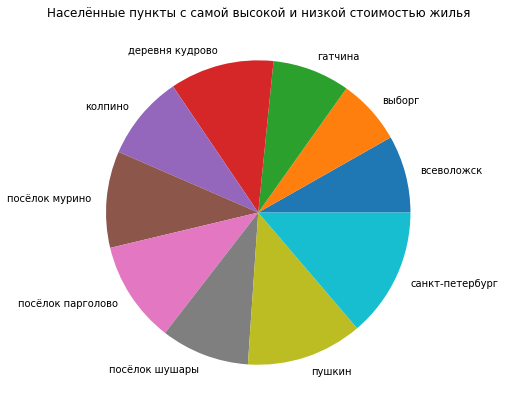

In [75]:
top_10.pivot_table(index='locality_name',values='cost_per_meter_mean') \
      .plot.pie(y='cost_per_meter_mean', figsize=(7,7), legend=False, label='', \
        title='Населённые пункты с самой высокой и низкой стоимостью жилья')
plt.show()


**Опишите, как стоимость объектов зависит от расстояния до центра города**

In [76]:
spb = data.loc[data['locality_name'] == 'санкт-петербург']
spb['city_centers_nearest'].isna().sum()

60

In [77]:
spb = spb.dropna(subset=['city_centers_nearest'])
spb['city_centers_nearest_km'] = data.distance_city_center_km

spb['city_centers_nearest_km'].describe()

count    15591.000000
mean        11.583414
std          4.854068
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

Диаграмма размаха удалённости от центра


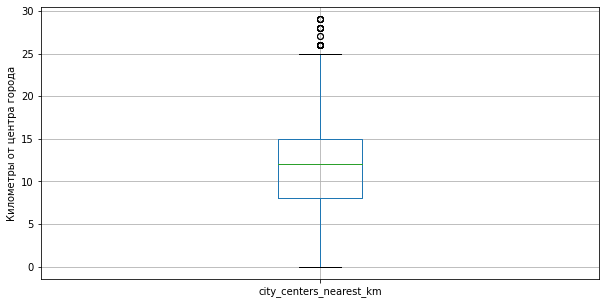

In [78]:
print('Диаграмма размаха удалённости от центра')
spb.boxplot('city_centers_nearest_km', figsize=(10,5))

plt.ylabel('Километры от центра города')
plt.show()

Диаграмма размаха удалённости от центра


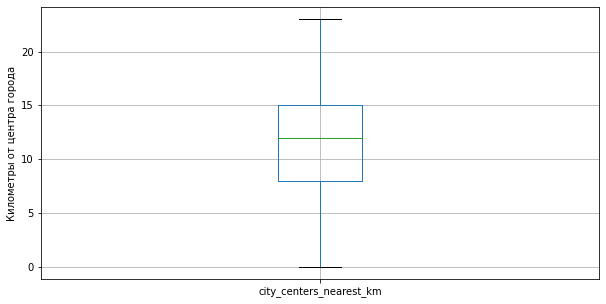

In [79]:
spb = spb.loc[spb['city_centers_nearest_km'] < 24]
print('Диаграмма размаха удалённости от центра')
spb.boxplot('city_centers_nearest_km', figsize=(10,5))

plt.ylabel('Километры от центра города')
plt.show()

In [80]:
mean_cost_per_km = spb['last_price'].sum()/spb['city_centers_nearest_km'].sum()
print(f'Средняя цена для каждого километра составляет {mean_cost_per_km:.0f} руб.')

Средняя цена для каждого километра составляет 702076 руб.


**Построим график: он будет показывать, как цена зависит от удалённости от центра. А так же определим границу центральной зоны.**

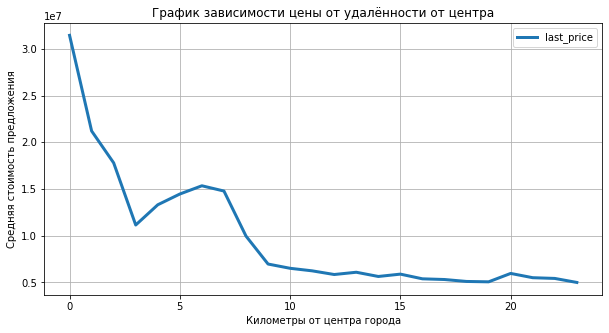

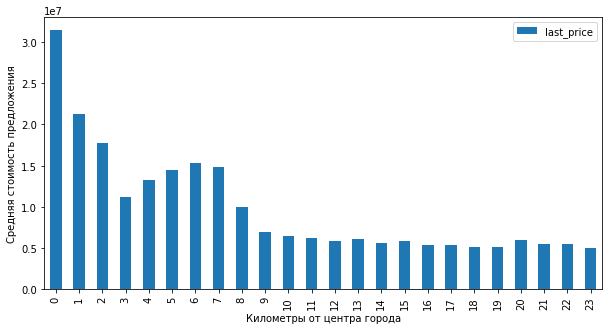

In [81]:
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(kind='bar', figsize=(10,5))
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Очевидно, что падение цены на графике сильно изменилось при достижении значения в 6-7 км, это говорит нам, что центральным районом можно считать все квартиры в удалении от центра не более чем на 7 км.

### Напишите общий вывод

В данном исследовании были проанализированы объявления о продаже квартир в Санкт-Петербурге и в его пригородах. В ходе подготовки данных к анализу я столкнулся с большим количеством пропусков в колонках, которые могут влиять как на среднюю цену предложения квартир на рынке, так и на анализ выделенных групп в частности. Пропуски в некоторых колонках были восполнены средним либо медианным значением или же вовсе, восполнены нулями из-за отсутствия тех или иных параметров. Были также и такие колонки, где данные получены автоматически на основе картографических данных и пропуски в них были оставлены без изменения.

По результату проделанной работы по обработке и анализу недостающих данных, несомненно надо обратить внимание коллег по подготовке и сбору данных на заполняемость ячеек, либо на корректность выгрузки данных из программы. Ошибок связанных с человеческим фактором(опечаток и пр.) довольно мало, что сильно облегчило труд по предобработке материала для анализа.

После избавления пропусков и выбивающихся значений был произведен подсчёт средней стоимости квадратного метра жилья, стоимость каждого километра удаления от центра, выделен сегмент квартир расположенных в центре и проанализированы их параметры, а так же проанализирована скорость продажи объявления с даты его размещения, факторы влияющие на это и проанализирована статистика продаж в зависимости от периода размещения объявления.

Для большей наглядности при анализе использовались графики, из которых лего можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург", несмотря на это средняя цена квадратного метра приблизительно такая же как и по области. Тенденция рынка такова, люди в основной своей массе стараются найти предложения квартир на любом этаже за исключением первого и последнего, за частую это высотные здания и новостройки. В центре же города ситуция обратная, застройки практически никакой не ведётся, этажность домов не большая и продажа квартир ведётся из старого фонда, что и отражается на снижающемся спросе начиная с 2016 года.

Резюмируя итог исследовательской работы мы имеем, что в большинстве из случаев продаются 1-2 комнатные квартиры старого фонда хрущевской застройки за полугодичный срок, со средней стоимостью в 115 т.р. за кв.метр. и высотой потолков 2,65м..  Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой в отличии от цен на жильё расположенного по центру исторического района города в невысоких домах из старого фонда.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [X]  В конце проекта сделан общий вывод.